# 作业

## 金融场景：绘制收益率的折线图（1分+2分+1分+2分+2分+2分=10分）
IBM的股票代码为IBM，标普指数的代码为SP，可口可乐的股票代码是KO，三者的月度收益率序列存储在'datasets/ibmspko.csv'文件中。
1. 请使用pandas读取收益率序列
2. 绘制可口可乐的收益率序列的频率分布图，bins参数为50
3. 使用`pd.DataFrame.cumsum()`计算可口可乐的收益率序列的**累积收益率**序列
4. 绘制可口可乐的收益率序列的**累积收益率**折线图
5. 在一个坐标轴中，绘制3个（IBM、SP，KO）的累积收益折线图，分别使用3种marker（"^"，"o",  "x"）,显示图例legend
6. 绘制一个图形，包含3个子图，每个子图中分别绘制3个（IBM、SP，KO）的累积收益折线图，分别使用3种marker（"^"，"o",  "x"）,显示图例legend


1. 请使用pandas读取收益率序列

In [19]:
import pandas as pd
df = pd.read_csv("datasets/ibmspko.csv", index_col=0)
df.head()

,ibm,sp,ko
date,,,
1961-01-31,0.072513,0.063156,0.009331
1961-02-28,0.062500,0.026870,0.103236
1961-03-30,0.029630,0.025536,0.012291
1961-04-28,0.027338,0.003843,-0.050000
1961-05-31,0.027521,0.019139,0.087719


2. 绘制可口可乐的收益率序列的频率分布图，bins参数为50

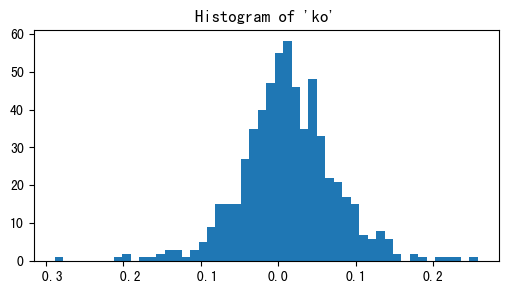

In [29]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(6,3))
ax.hist(df['ko'], bins=50)
ax.set_title("Histogram of 'ko'")
plt.show()

3. 使用pd.DataFrame.cumsum()计算可口可乐的收益率序列的累积收益率序列

In [30]:
df['ko'].cumsum()

date
1961-01-31    0.009331
1961-02-28    0.112567
1961-03-30    0.124858
1961-04-28    0.074858
1961-05-31    0.162577
                ...   
2011-08-31    7.675980
2011-09-30    7.641629
2011-10-31    7.652878
2011-11-30    7.643803
2011-12-30    7.684559
Name: ko, Length: 612, dtype: float64

4. 绘制可口可乐的收益率序列的累积收益率折线图

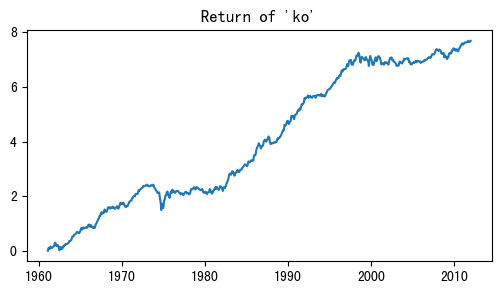

In [36]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(6,3))
y=df['ko'].cumsum()
x=pd.to_datetime(df.index)
ax.plot(x, df['ko'].cumsum())
ax.set_title("Return of 'ko'")
plt.show()


5. 在一个坐标轴中，绘制3个（IBM、SP，KO）的累积收益折线图，分别使用3种marker（"^"，"o", "x"）,显示图例legend

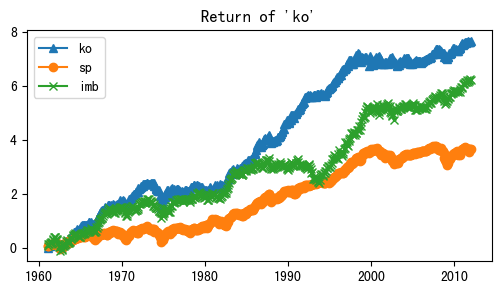

In [42]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(6,3))
date=pd.to_datetime(df.index)
ko=df['ko'].cumsum()
sp=df['sp'].cumsum()
ibm=df['ibm'].cumsum()
ax.plot(date, ko, label='ko', marker='^')
ax.plot(date, sp, label='sp', marker='o')
ax.plot(date, ibm, label='imb', marker='x')
ax.set_title("Return of 'ko'")
ax.legend()
plt.show()

6. 绘制一个图形，包含3个子图，每个子图中分别绘制3个（IBM、SP，KO）的累积收益折线图，分别使用3种marker（"^"，"o", "x"）,显示图例legend

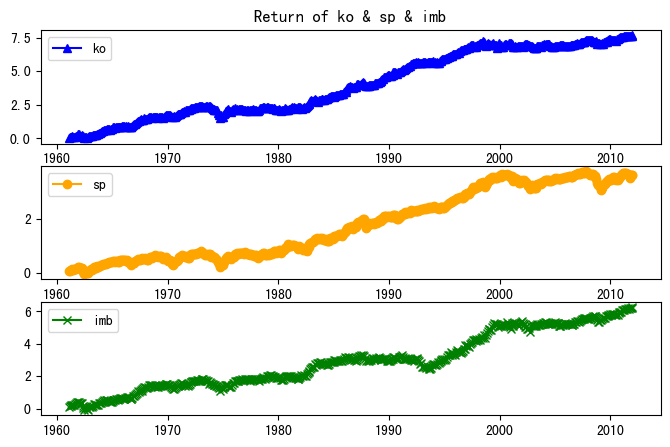

In [53]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(nrows=3, ncols=1, figsize=(8,5))
date=pd.to_datetime(df.index)
ko=df['ko'].cumsum()
sp=df['sp'].cumsum()
ibm=df['ibm'].cumsum()
ax[0].plot(date, ko, label='ko', marker='^', color='blue')
ax[1].plot(date, sp, label='sp', marker='o', color='orange')
ax[2].plot(date, ibm, label='imb', marker='x', color='green')
ax[0].set_title("Return of ko & sp & imb")
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## 商业场景：巧克力市场的可视化（1分+1分+2分+2分+2分+2分=10分）
巧克力是以可可制品(包括可可脂、可可粉或可可浆)和糖为主要原材料制成的一种甜食，口感细腻甜美，并伴随一股浓郁的香气，是休闲零食的一大品类。

2010年以来，全球巧克力产品销售规模稳步增长，Statista数据显示，2019年全球巧克力产品销售规模达1186.2亿美元，同比2018年增长4.4%，预计2020年全年销售额可达1237.0亿美元，到2023年全球销售额将超过1350亿美元。按照消费量计，2019年全球巧克力产品消费量达1042.4万吨，同比2018年增长1.8%，预计2020年全年消费量可达1060.1万吨，到2023年全球消费量将超过1100万吨。

按照产品中使用代可可脂及是否添加辅料，可将巧克力产品进一步细分。常见的纯巧克力有黑巧克力、白巧克力、牛奶巧克力等，巧克力制品则有果仁巧克力、夹心巧克力、威化巧克力、酒心巧克力等。

完成以下任务：
1. 读取'datasets/Chocolate.csv'里的数据
2. 绘制价格的频数图，描述样本的价格分布
3. 绘制箱型图，进一步了解价格的分位数（例如50%、75%分位数）
4. 绘制饼状图，观察德芙、好时和费列罗等品牌的市场占有率
5. 绘制饼状图，观察牛奶巧克力、黑巧克力、夹心巧克力、榛果等不同口味的市场占有率
6. 绘制散点图，观察价格和销量之间的关系

下述代码可以激活图片中使用中文字体：

In [56]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

1. 读取'datasets/Chocolate.csv'里的数据，

In [67]:
import pandas as pd
df= pd.read_csv('datasets/Chocolate.csv')
df.head(5)

,价格,名称,评价数,品牌,口味
0,30.9,德芙Dove丝滑牛奶巧克力分享碗装 252g 代言人同款 休闲零食婚庆糖果礼品（新旧包装随机发放）,5000000.0,德芙,牛奶巧克力
1,30.9,德芙Dove香浓黑巧克力分享碗装 252g 代言人同款办可可脂公室零食婚庆喜糖(新旧包装随机发放),5000000.0,德芙,黑巧克力
2,139.9,费列罗(FERRERO)榛果威化糖果巧克力制品 婚庆喜糖零食伴手礼 节日礼物员工福利 48粒...,2000000.0,费列罗,榛果
3,399.0,歌帝梵GODIVA比利时进口夹心巧克力金装25枚万圣节礼物送儿童女友女朋友男朋友生日礼物情人...,20000.0,歌帝梵,夹心巧克力
4,41.9,德芙 Dove分享碗装66%可可脂醇黑巧克力 252g 代言人同款糖果巧克力 休闲零食婚庆喜糖,5000000.0,德芙,黑巧克力


2. 绘制价格的频数图，描述样本的价格分布

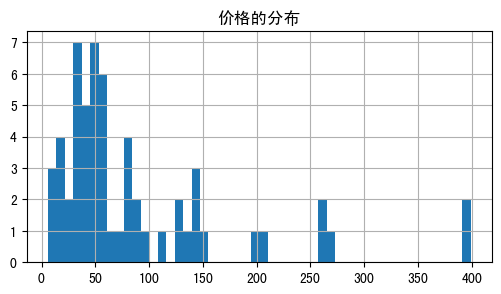

In [58]:
Z = df['价格']
fig, ax = plt.subplots(figsize=(6,3))      
ax.hist(Z, bins=50)               
ax.set_title('价格的分布')
ax.grid()
plt.show()

通过上图，我们可以观察到巧克力的价格主要分布于50元左右，部分价格较高的，可以达到400元。

3. 使用箱型图进一步了解价格的分位数（例如50%、75%分位数）

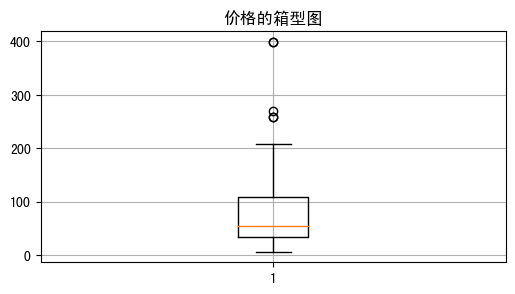

In [59]:
Z = df['价格']
fig, ax = plt.subplots(figsize=(6,3))
ax.boxplot(Z)
ax.set_title('价格的箱型图')
ax.grid()
plt.show()

绘制箱型图，可以进一步得到结论，75%的巧克力价格都在100元以下。

4. 绘制饼状图，观察德芙、好时和费列罗等品牌的市场占有率

In [60]:
pct1 = df[df['品牌']=='德芙']['评价数'].sum()/df['评价数'].sum()
pct2 = df[df['品牌']=='好时']['评价数'].sum()/df['评价数'].sum()
pct3 = df[df['品牌']=='费列罗']['评价数'].sum()/df['评价数'].sum()
pct4 = df[df['品牌']=='Meiji']['评价数'].sum()/df['评价数'].sum()
pct5 = df[df['品牌']=='歌帝梵']['评价数'].sum()/df['评价数'].sum()

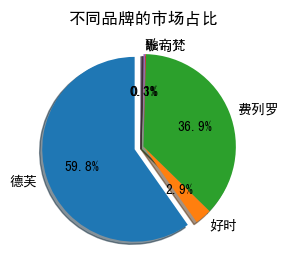

In [62]:
labels = [ '德芙', '好时', '费列罗', 'Meiji', '歌帝梵']
X = [pct1, pct2, pct3, pct4, pct5]
autopct='%1.1f%%'
explode = (0.1, 0, 0, 0, 0.1)

fig, ax = plt.subplots(figsize=(6,3))
ax.pie(X, labels=labels,
          autopct=autopct,
          explode=explode,
          shadow=True,
          startangle=90)             
ax.set_title('不同品牌的市场占比')
plt.show()

通过观察上面的饼图，很容易知道德芙品牌的市场占有率最高（59.8%），为市场第一大品牌。其他品牌中，费列罗的占有率居第二，为36.9%。好时、'Meiji', '歌帝梵'的占有率较低，划分剩余的市场份额。


产生以上的原因，可能是：
1. 德芙的市场营销做的比较好
2. 德芙的巧克力收到消费者的偏好（价格、口味、品牌等）
3. 经济学原理里的非完全竞争市场造成的，这种市场出现寡头、垄断等现象，部分品牌较高的市场占有率较高，具有市场支配地位  
以上的猜测有待进一步分析和证实

5. 绘制饼状图，观察牛奶巧克力、黑巧克力、夹心巧克力、榛果等不同口味的市场占有率

In [68]:
pct1 = df[df['口味']=='牛奶巧克力']['评价数'].sum()/df['评价数'].sum()
pct2 = df[df['口味']=='黑巧克力']['评价数'].sum()/df['评价数'].sum()
pct3 = df[df['口味']=='夹心巧克力']['评价数'].sum()/df['评价数'].sum()
pct4 = df[df['口味']=='榛果']['评价数'].sum()/df['评价数'].sum()

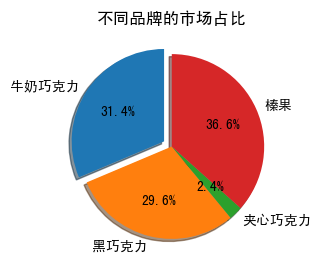

In [69]:
labels = [ '牛奶巧克力', '黑巧克力', '夹心巧克力', '榛果']
X = [pct1, pct2, pct3, pct4]
autopct='%1.1f%%'
explode = (0.1, 0, 0, 0)

fig, ax = plt.subplots(figsize=(6,3))
ax.pie(X, labels=labels,
          autopct=autopct,
          explode=explode,
          shadow=True,
          startangle=90)             
ax.set_title('不同品牌的市场占比')
plt.show()

看到的一些结果：商品不同的口味的市场占比是相似的，牛奶巧克力、榛果、黑巧克力几乎平均得占有了市场的全部，分别为31%，29%，37%。我们猜测有以下原因：
1. 消费者的口味是不同的，三种口味的喜好的人群数量接近
2. 在电商平台上，市场具有高度的自由选择权，不存在渠道，或者商家强制销售或支配消费者的情况，消费者具有很强的自主权
3. 地区原因，国内消费者的特殊偏好

以上的猜想需要进一步分析和证实

6. 绘制散点图，观察价格和销量之间的关系

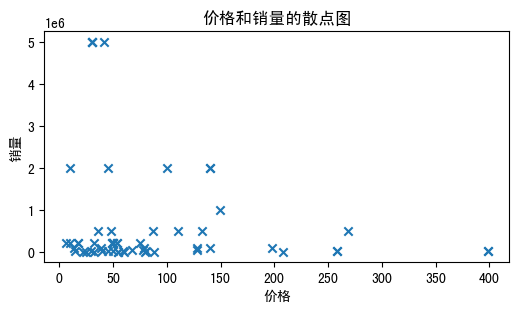

In [73]:
fig, ax = plt.subplots(figsize=(6,3))
price = df['价格']
vol = df['评价数']
ax.scatter(price, vol, marker='x')             
ax.set_title('价格和销量的散点图')
ax.set_xlabel('价格')
ax.set_ylabel('销量')
plt.show()

结合电商平台不披露商品销量、但是披露消费者对于商品的评价数这个原因，我们容易理解为什么散点图里，散点呈阶梯式分布。

从消费者的角度，观察上图，价格分布在50元左右及以下的商品，呈现一个特点：价格越低，销量越好。
销量最高可以达到5百万。但是价格继续下跌，销量反而下降了，产生这个的原因可能有：
1. 价格低的品牌或口味不受欢迎
2. 消费者担心质量问题  
3. 消费者群体对于价格区间的认同，30-40元；并且存在跟随、羊群效应  
以上的猜想有待进一步证实。

我们还能够观察到，在50元左右样本数较多，但是销量普遍不高，产生的原因可能有：商家在这一价格区间上竞争很激烈，但是总的市场份额又有限，造成每一个商家销量反而不高。

当价格超过50元，消费量呈现一直下跌的趋势，当价格接近400元，销量下滑到接近0。这种下滑的原因可能有：
1. 符合经济学规律，价格越高，销量越低，价格越高会抑制消费意愿
2. 较高价格的商品本身并不受消费喜欢（口味、包装等），受众不高。

以上的猜想有待进一步证实